In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./medical-insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [10]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
df = df.drop('region', axis=1)

In [13]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [14]:
X = df.drop('charges', axis=1)
y = df['charges']

# Min-Max scaling
X_scaled = (X - X.min()) / (X.max() - X.min())

# Convert y to numpy array
y = y.values.reshape(-1, 1)

In [15]:
# Add bias (intercept) column manually (column of ones)
import numpy as np
X_scaled = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled.values))

# Final shapes
print("Shape of X_scaled:", X_scaled.shape)
print("Shape of y:", y.shape)

Shape of X_scaled: (1338, 6)
Shape of y: (1338, 1)


In [16]:
# Initialize parameters
m = X_scaled.shape[0]  # number of examples
n = X_scaled.shape[1]  # number of features (with bias)
theta = np.zeros((n, 1))  # initialize weights to zero

# Set hyperparameters
learning_rate = 0.01
iterations = 10000

# To store cost after every 100 iterations
cost_history = []

# Batch Gradient Descent
for i in range(iterations):
    y_pred = X_scaled @ theta  # predicted y
    error = y_pred - y         # error term
    cost = (1 / (2 * m)) * np.sum(error ** 2)  # mean squared error
    
    # Gradient calculation
    gradients = (1 / m) * (X_scaled.T @ error)
    
    # Update theta
    theta = theta - learning_rate * gradients
    
    # Store cost every 100 iterations for plotting
    if i % 100 == 0:
        cost_history.append(cost)

print("Training complete!")
print("Final cost:", cost)
print("Final theta parameters:\n", theta)


Training complete!
Final cost: 18354856.069151133
Final theta parameters:
 [[-1807.07526464]
 [11868.40568834]
 [ -132.80767721]
 [10874.45887612]
 [ 2311.93616407]
 [23810.27844149]]


In [17]:
# Predict on entire training data
y_pred = X_scaled @ theta


In [18]:
# Evaluation Metrics
mae = np.mean(np.abs(y_pred - y))
mse = np.mean((y_pred - y) ** 2)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 4136.430935243407
MSE: 36709696.73170867
RMSE: 6058.852757057945


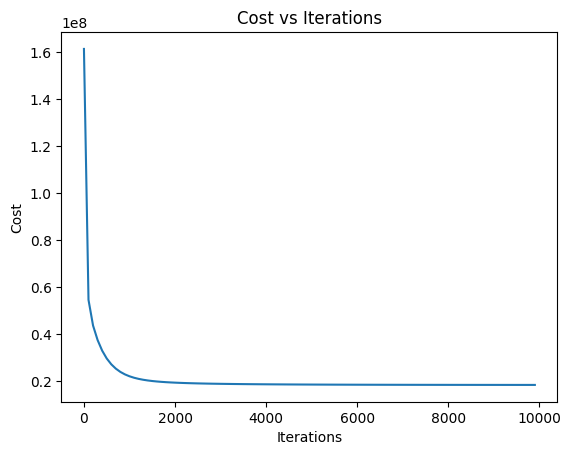

In [19]:
import matplotlib.pyplot as plt

plt.plot(range(0, iterations, 100), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()


In [20]:
# 1. Create input array
new_data = np.array([[45, 1, 24.0, 2, 0]])  # Without bias

# 2. Scale it using same min and max
# (use training set min and max values)
X_min = X.min()
X_max = X.max()
new_data_scaled = (new_data - X_min) / (X_max - X_min)

# 3. Add bias term
new_data_scaled = np.hstack((np.ones((new_data_scaled.shape[0], 1)), new_data_scaled))

# 4. Predict
predicted_charge = new_data_scaled @ theta

print("Predicted Insurance Charge for new person: ${:.2f}".format(predicted_charge[0][0]))


ValueError: Length of values (1) does not match length of index (5)